Problem 3.7

Plot the radiation pattern for a finite length dipole antenna of lengths $\lambda/4, \lambda/2, \lambda$ Plot the radiation pattern for an antenna of infintesimal length for comparison.

Radiation pattern

$$\frac{cos(klcos(\theta))-cos(kl)}{sin(\theta)}$$

Wave number and length simplification
$$ k*l = \frac{2\pi}{\lambda} * \frac{\lambda}{n} = \frac{2\pi}{n} $$

Radiation pattern for a hertzian dipole

$$f(\theta)=sin^{2}\theta$$

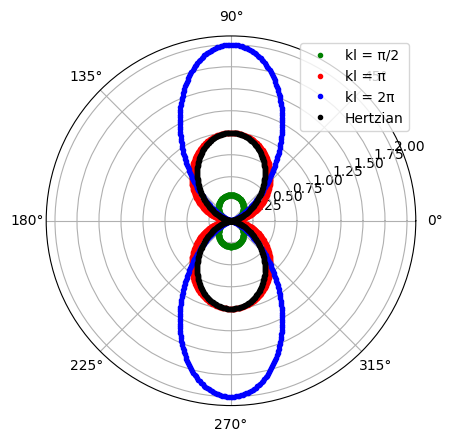

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Variable setup
kl = [np.pi/2, np.pi, 2*np.pi]
theta = np.arange(0.01, 2*np.pi, 0.01)  # Avoid theta = 0

# Calculate the antenna patterns
rad_pat_1 = (np.cos(kl[0] * np.cos(theta) / 2) - np.cos(kl[0] / 2)) / np.sin(theta)
rad_pat_2 = (np.cos(kl[1] * np.cos(theta) / 2) - np.cos(kl[1] / 2)) / np.sin(theta)
rad_pat_3 = (np.cos(kl[2] * np.cos(theta) / 2) - np.cos(kl[2] / 2)) / np.sin(theta)

# Calculate an antenna of infinitesimal length (Hertzian)
rad_pat_4 = np.sin(theta) ** 2

# Plot the radiation patterns
plt.polar(theta, np.abs(rad_pat_1), 'g.', label="kl = π/2")
plt.polar(theta, np.abs(rad_pat_2), 'r.', label="kl = π")
plt.polar(theta, np.abs(rad_pat_3), 'b.', label="kl = 2π")
plt.polar(theta, np.abs(rad_pat_4), 'k.', label="Hertzian")

# Show legend
plt.legend()
plt.show()


Problem 3.8

Plot the radiation resistance of a dipole antenna as a function of electrical length. Include the radiation resistance of a hertzian dipole.

Radiation resistance 

$$ R_{rad} = \frac{\eta f(kl)}{2\pi sin^{2}(kl/2)} $$

Radiation resistance of a hertzian dipole

$$ R_{rad} = \eta\frac{(kl)^{2}}{6\pi} $$

Where $\eta=377$ is the impedance of freespace and $f(kl)$ is

$$ \gamma + ln(kl) - C_{i}(kl) + \frac{1}{2}sin(kl)[S_{i}(2kl)-2S_{i}(kl)] + \frac{1}{2}cos(kl)[\gamma+ln(kl/2)+C_{i}(2kl)-2C_{i}(kl)] $$

Where $$ C_{i}(kl) = -\int_{x}^{\inf}\frac{cos(t)}{t}dt $$

$$ S_{i}(kl) = \int_{0}^{x}\frac{sin(t)}{t}dt $$

Using $l/\lambda$ is the electrical length changes the kl product to 

$$\frac{kl}{\lambda}=\frac{2\pi}{n\lambda}$$

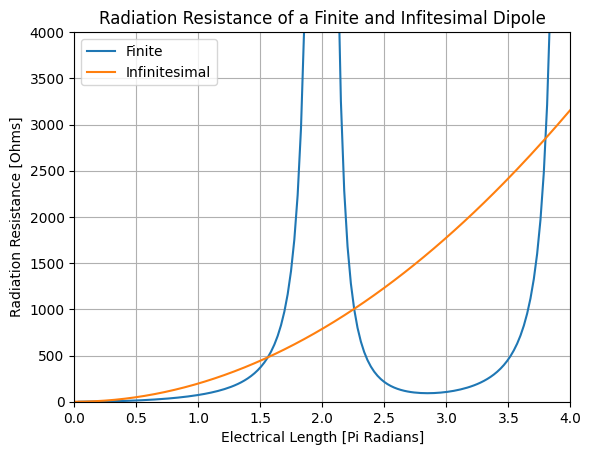

In [24]:
from scipy.special import sici
import numpy as np
import matplotlib.pyplot as plt

# Define electrical length
#f = np.linspace(1e6,1e9,150)
#lam = 3e8/f
#k = 2*np.pi / lam
#elec_len = k * l
elec_len = np.linspace(0.01, 4*np.pi, 150)

#constants
eta = 377  # Intrinsic impedance of free space
gamma = 0.5772 # Euler's constant

#### Radiation resistance of a Infinitesimal Dipole ####
rad_res_h = eta * (elec_len) ** 2 / (6 * np.pi)

#### Radiation resistance of a Finite Dipole ####
# Integrate over each value in elec_len
S_1, C_1 = sici(elec_len)
S_2, C_2 = sici(2*elec_len)

# Radiation pattern integral
f_kl = (gamma 
        + np.log(elec_len) 
        - C_1 
        + 0.5*np.sin(elec_len) * (S_2-2*S_1) 
        + 0.5*np.cos(elec_len) * (gamma+np.log(elec_len/2)+C_2-2*C_1)
        )

# Radiation resistance of a finite dipole
rad_res = (eta*f_kl) / (2*np.pi*(np.sin(elec_len/2))**2)

#### Plot ####
plt.plot(elec_len/np.pi, rad_res, label = "Finite")
plt.plot(elec_len/np.pi, rad_res_h, label = "Infinitesimal")
plt.xlabel("Electrical Length [Pi Radians]")
plt.ylabel("Radiation Resistance [Ohms]")
plt.title("Radiation Resistance of a Finite and Infitesimal Dipole")
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.set_xlim([0, 4])
ax.set_ylim([0, 4000])
plt.show()
